# Análise Exploratória de Dados e Modelagem de Propensão

## Objetivo da Aula

- Compreender a importância da Análise Exploratória de Dados no processo de Data Science.
- Aprender técnicas e ferramentas para realizar a AED eficazmente.
- Construir e avaliar um modelo de propensão.


## 1. Introdução à Análise Exploratória de Dados (AED)

### O que é AED?

A Análise Exploratória de Dados (AED) é o processo de análise de conjuntos de dados para resumir suas principais características, muitas vezes utilizando métodos visuais. Ela ajuda a entender melhor os dados, descobrir padrões, detectar anomalias, testar hipóteses e verificar suposições com a ajuda de estatísticas sumárias e representações gráficas.

### Objetivos da AED

- Compreender a distribuição dos dados.
- Identificar padrões, outliers, e anomalias.
- Formular hipóteses para análises posteriores.


## 2. Ferramentas e Bibliotecas para AED

### Bibliotecas Python

- **Pandas**: Manipulação e análise de dados.
- **Matplotlib/Seaborn**: Visualização de dados.
- **NumPy**: Operações numéricas.
- **Scipy**: Estatísticas e cálculos matemáticos.
- **Scikit-learn**: Modelagem e avaliação de modelos.

Vamos começar instalando e importando as bibliotecas necessárias.


In [22]:
# Instalação de Bibliotecas
# !pip install "pandas~=2.0.0" matplotlib seaborn numpy scipy scikit-learn

In [48]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    confusion_matrix,
)

sns.set_style()


## 3. Carregando e Entendendo os Dados

Vamos usar o famoso dataset do Titanic para realizar a Análise Exploratória de Dados. Este dataset contém informações sobre os passageiros do Titanic, incluindo se eles sobreviveram ou não.


As colunas do dataset do Titanic são as seguintes:

- **PassengerId**: Identificador único de cada passageiro.
- **Survived**: Indica se o passageiro sobreviveu (1) ou não (0).
- **Pclass**: Classe em que o passageiro viajava (1ª, 2ª ou 3ª classe).
- **Name**: Nome do passageiro.
- **Sex**: Gênero do passageiro (masculino ou feminino).
- **Age**: Idade do passageiro.
- **SibSp**: Número de irmãos/cônjuges a bordo do Titanic.
- **Parch**: Número de pais/filhos a bordo do Titanic.
- **Ticket**: Número do ticket do passageiro.
- **Fare**: Valor da tarifa paga pelo passageiro.
- **Cabin**: Número da cabine do passageiro.
- **Embarked**: Porto de embarque do passageiro (C = Cherbourg, Q = Queenstown, S = Southampton).


In [24]:
# Carregar um dataset de exemplo
df = pd.read_csv(
    "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
)

In [25]:
# Visualizar as primeiras linhas do dataset
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [27]:
# Obter informações sobre o dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [28]:
# Estatísticas descritivas do dataset
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 4. Análise Univariada

A análise univariada envolve a análise de uma única variável. Vamos explorar a distribuição da idade dos passageiros e identificar outliers.


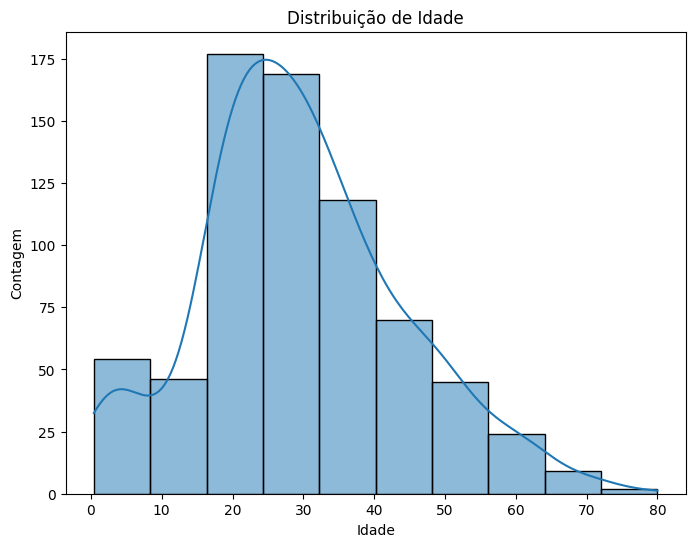

In [44]:
# Histograma da idade dos passageiros
plt.figure(figsize=(8, 6))
sns.histplot(df["Age"].dropna(), bins=10, kde=True)
plt.title("Distribuição de Idade")
plt.xlabel("Idade")
plt.ylabel("Contagem")
plt.show()

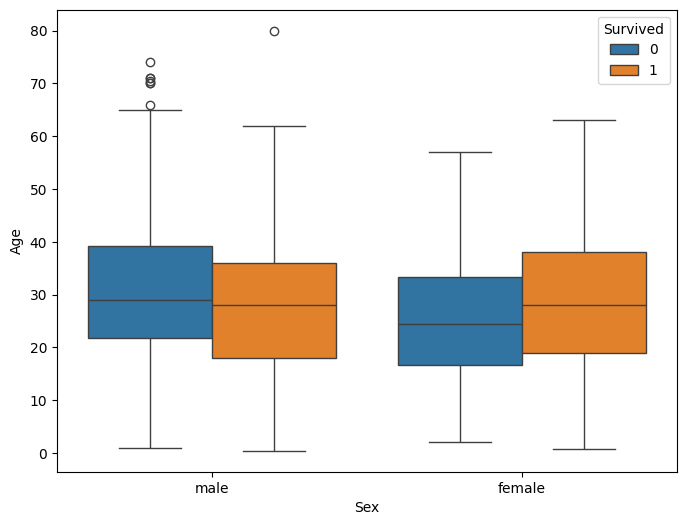

In [30]:
# Boxplot para visualizar outliers na idade
plt.figure(figsize=(8, 6))
sns.boxplot(x="Sex", y="Age", hue="Survived", data=df)
plt.show()

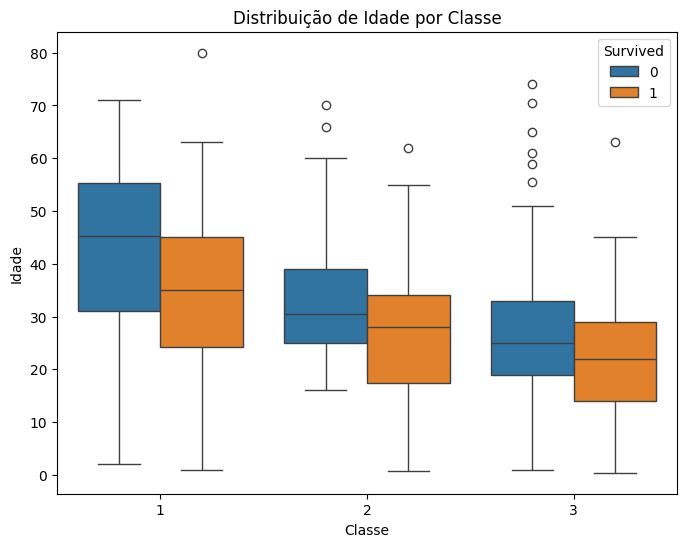

In [31]:
# Boxplot para visualizar outliers na idade
plt.figure(figsize=(8, 6))
sns.boxplot(x="Pclass", y="Age", data=df, hue="Survived")
plt.title("Distribuição de Idade por Classe")
plt.xlabel("Classe")
plt.ylabel("Idade")
plt.show()

In [32]:
# Cálculo de medidas estatísticas
media_idade = df["Age"].mean()
mediana_idade = df["Age"].median()
moda_idade = df["Age"].mode()[0]

pd.DataFrame(
    [{"Média": media_idade, "Mediana": mediana_idade, "Moda": moda_idade}],
)

,Média,Mediana,Moda
0,29.699118,28.0,24.0


In [33]:
# Cálculo de medidas estatísticas
# SELECT Pclass, AVG(Age), MEDIAN(Age), STDDEV(Age) FROM df GROUP BY Pclass
gb = df.groupby("Pclass")["Age"].agg(["mean", "median", "std"])
gb

,mean,median,std
Pclass,,,
1,38.233441,37.0,14.802856
2,29.877630,29.0,14.001077
3,25.140620,24.0,12.495398


## 5. Análise Bivariada

A análise bivariada envolve a análise da relação entre duas variáveis. Vamos explorar a relação entre idade e tarifa, e calcular a correlação entre essas variáveis.


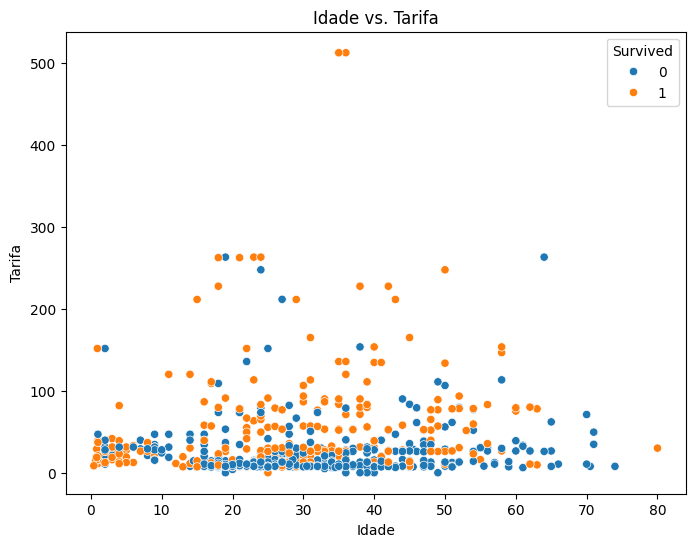

In [34]:
# Scatter plot entre Idade e Tarifa
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Age", y="Fare", hue="Survived", data=df)
plt.title("Idade vs. Tarifa")
plt.xlabel("Idade")
plt.ylabel("Tarifa")
plt.show()

In [35]:
# Cálculo de correlação
correlacao = df["Age"].corr(df["Fare"])
print(f"Correlação entre Idade e Tarifa: {correlacao:.2f}")

Correlação entre Idade e Tarifa: 0.10


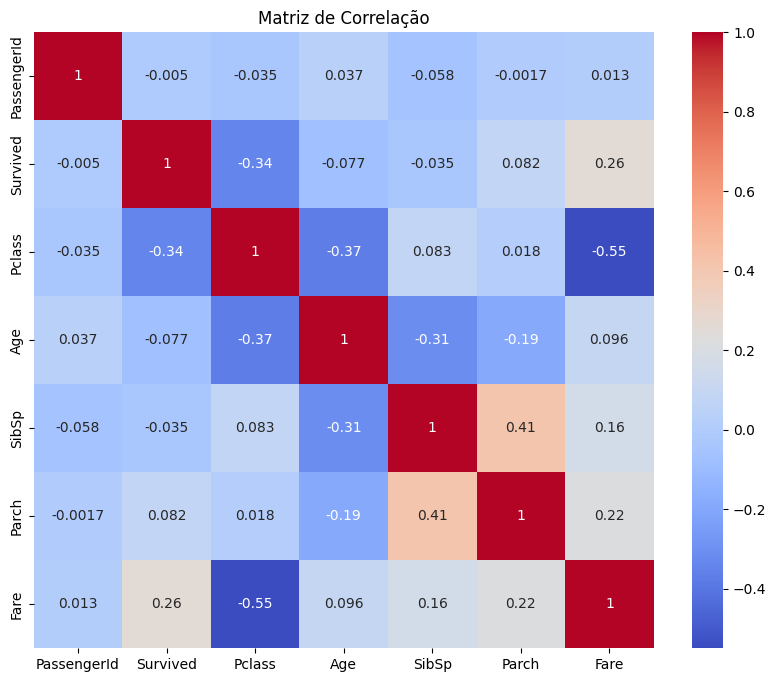

In [36]:
# Matriz de correlação com Heatmap
plt.figure(figsize=(10, 8))
correlacao_matriz = df.corr(numeric_only=True)
sns.heatmap(correlacao_matriz, annot=True, cmap="coolwarm")
plt.title("Matriz de Correlação")
plt.show()

## 6. Análise Multivariada

A análise multivariada envolve a análise de mais de duas variáveis ao mesmo tempo. Vamos explorar interações entre múltiplas variáveis usando gráficos de pares.


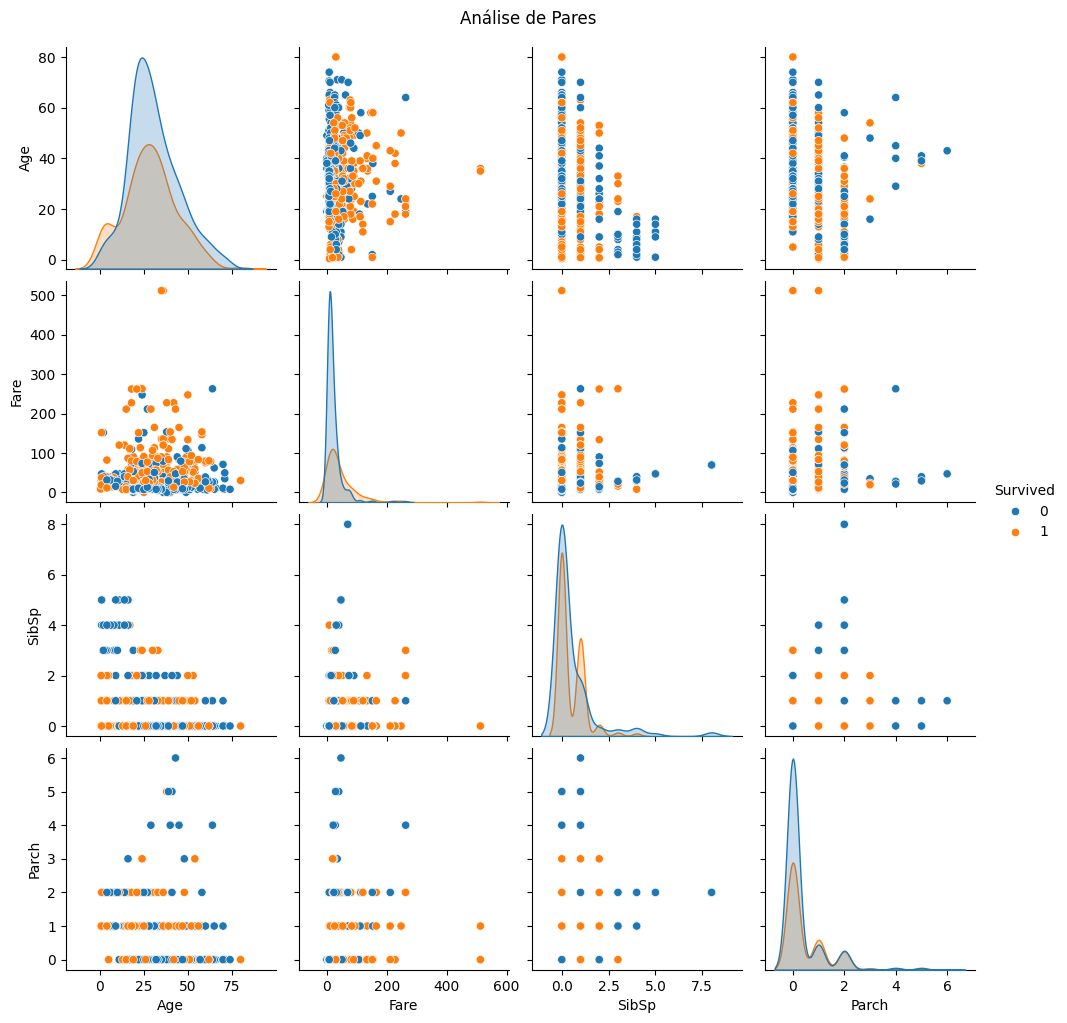

In [37]:
# Gráfico de pares (pairplot) com Seaborn
sns.pairplot(df, hue="Survived", vars=["Age", "Fare", "SibSp", "Parch"])
plt.suptitle("Análise de Pares", y=1.02)
plt.show()

## 7. Construção de um Modelo de Propensão

## Exemplos de Aplicações de um Modelo de Propensão



Um modelo de propensão como o treinado na base de dados do Titanic, que contém informações de passageiros como idade, sexo, classe de passagem, e se sobreviveram ou não, pode ser aplicado em várias situações práticas para demonstrar diferentes conceitos e técnicas de aprendizado de máquina, como:

### 1. Análise de Risco em Transportes
- **Objetivo**: Melhorar a segurança de passageiros em diferentes meios de transporte.
- **Aplicação**: Utilizar insights do modelo para identificar fatores que podem aumentar a probabilidade de sobrevivência em acidentes e aplicar esses insights para desenvolver melhores protocolos de segurança.

### 2. Seguros de Vida
- **Objetivo**: Calcular prêmios de seguro de vida.
- **Aplicação**: Usar o modelo para avaliar o risco de mortalidade com base em características dos passageiros, ajustando os prêmios de seguro de acordo com o risco estimado.

### 3. Serviços de Atendimento ao Cliente
- **Objetivo**: Melhorar a experiência do cliente.
- **Aplicação**: Identificar clientes mais propensos a cancelar serviços ou fazer reclamações, permitindo a implementação de medidas preventivas para aumentar a satisfação e retenção de clientes.

### 4. Marketing Direcionado
- **Objetivo**: Aumentar a eficiência das campanhas de marketing.
- **Aplicação**: Utilizar o modelo para identificar grupos de passageiros (clientes) com maior propensão a responder positivamente a campanhas promocionais ou novas ofertas.

### 5. Planejamento de Resgate em Desastres
- **Objetivo**: Melhorar os planos de resgate em desastres.
- **Aplicação**: Analisar os dados para identificar quais grupos de pessoas têm maior probabilidade de sobrevivência em diferentes cenários, ajudando a planejar operações de resgate mais eficazes.

### 6. Modelagem de Comportamento Humano
- **Objetivo**: Estudar o comportamento humano em situações de emergência.
- **Aplicação**: Utilizar os dados para entender como diferentes grupos de pessoas reagem em situações de emergência, informando políticas e treinamentos para melhorar as respostas a desastres.

Essas aplicações podem ser adaptadas para se adequar a diferentes contextos e setores, utilizando os princípios aprendidos com a análise da base de dados do Titanic para resolver problemas reais em diversas áreas.


### Definição do Problema

Queremos construir um modelo de propensão para prever a probabilidade de sobrevivência dos passageiros do Titanic.


### Preparação dos Dados

Antes de construir o modelo, precisamos preparar os dados, o que inclui a limpeza e a seleção de features relevantes.


In [38]:
# Seleção de features
features = ["Pclass", "Age", "SibSp", "Parch", "Fare"]
df = df.dropna(
    subset=features
)  # Remover linhas com valores nulos nas features selecionadas

# y = a * x + b
X = df[features]
y = df["Survived"]

# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### Construção do Modelo

Vamos usar um classificador de regressão logística para construir o nosso modelo de propensão.


In [39]:
# Construção do modelo de regressão logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Previsões
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [40]:
result = pd.DataFrame(X_test).reset_index(drop=True)

result["Predicted"] = y_pred.tolist()
result["Actual"] = y_test.values
result["Probability"] = [f"{100*i:.2f}%" for i in y_pred_proba.tolist()]

result.head(10)

,Pclass,Age,SibSp,Parch,Fare,Predicted,Actual,Probability
0,2,42.0,0,0,13.0000,0,0,30.32%
1,2,3.0,1,1,18.7500,1,1,76.11%
2,2,29.0,1,0,26.0000,0,1,40.04%
3,1,24.0,0,0,69.3000,1,1,80.93%
4,3,43.0,0,0,6.4500,0,0,11.52%
5,2,8.0,1,1,36.7500,1,1,72.47%
6,3,33.0,3,0,15.8500,0,1,8.54%
7,2,54.0,1,3,23.0000,0,1,27.13%
8,3,28.0,0,0,7.8958,0,0,22.18%
9,3,23.0,0,0,7.9250,0,0,26.98%


### Avaliação do Modelo

Vamos avaliar o modelo usando métricas como Acurácia, Precisão, Recall, e AUC-ROC.


In [41]:
# Avaliação do modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Acurácia: 0.70
Precisão: 0.67
Recall: 0.46


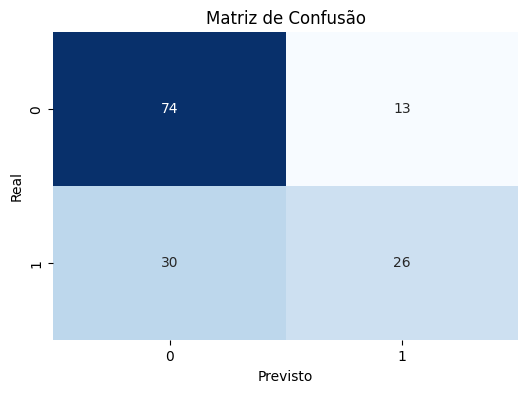

In [42]:
# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matriz de Confusão")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()

## 8. Conclusão

### Resumo dos Principais Pontos

- A Análise Exploratória de Dados (AED) é essencial para entender a distribuição dos dados, identificar padrões, detectar outliers, e formular hipóteses.
- A modelagem de propensão pode ser usada para prever a probabilidade de um evento, como a sobrevivência dos passageiros do Titanic, utilizando técnicas de aprendizado de máquina.

### Sessão de Perguntas e Respostas

Agora é o momento de abrir para perguntas e esclarecer quaisquer dúvidas que você possa ter sobre os tópicos discutidos.


## Recursos Adicionais

- **Livros:**
  - *Python for Data Analysis* de Wes McKinney.
  - *Hands-On Exploratory Data Analysis with Python* de Suresh Kumar Mukhiya.
  - *An Introduction to Statistical Learning* de Gareth James et al.
  
- **Cursos Online:**
  - [Coursera](https://www.coursera.org/courses?query=exploratory%20data%20analysis)
  - [Kaggle](https://www.kaggle.com/learn/data-visualization)
  - [Machine Learning Crash Course](https://developers.google.com/machine-learning/crash-course)

- **Tutoriais:**
  - [Pandas Documentation](https://pandas.pydata.org/docs/)
  - [Scikit-learn Documentation](https://scikit-learn.org/stable/user_guide.html)
  - [Seaborn Gallery](https://seaborn.pydata.org/examples/index.html)
